In [1]:
import numpy as np
from skimage.viewer import ImageViewer
from skimage import io
from skimage.filters import threshold_otsu

from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt
%matplotlib notebook
from skimage.morphology import closing, square
from skimage import filters

/home/ula/anaconda3/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [2]:
def get_frac_thresh(arr, frac):
    min_lum = np.min(arr)
    max_lum = np.max(arr)
    return min_lum + frac*(max_lum - min_lum)

In [3]:
dapi_path = "/media/ula/D/adam_catfish/catfish_dapi_tst.gif"
#dapi_path = "/media/ula/D/adam_catfish/catfish_dapi_tst_colored.gif"
arc_path = "/media/ula/D/adam_catfish/catfish_arc_tst.gif"
homer_path = "/media/ula/D/adam_catfish/catfish_homer_tst.gif"

In [4]:
dapi_img = io.imread(dapi_path)
arc_img = io.imread(arc_path)
homer_img = io.imread(homer_path)


<IPython.core.display.Javascript object>


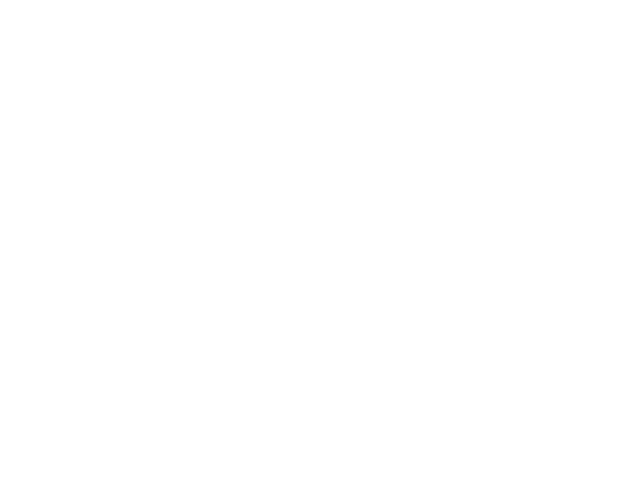

In [5]:
#viewer = ImageViewer(dapi_img)
#viewer.show()
plt.imshow(dapi_img)
plt.show()

<IPython.core.display.Javascript object>


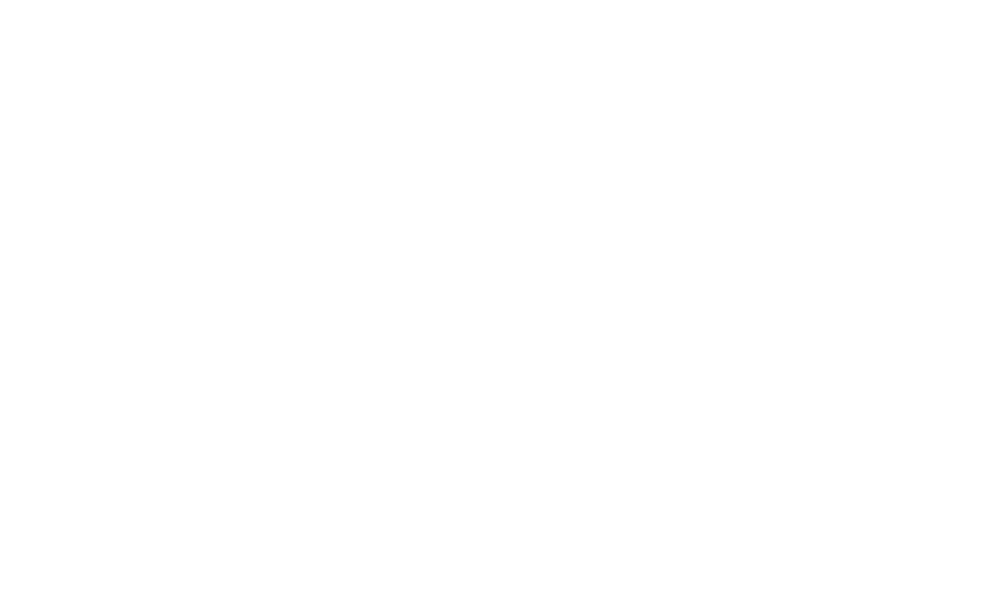

In [6]:
thresh = threshold_otsu(dapi_img)

thresholded = dapi_img > thresh

label_image = label(thresholded)
image_label_overlay = label2rgb(label_image, image=dapi_img)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
plt.show()

In [7]:
np.min(dapi_img)

3

<IPython.core.display.Javascript object>


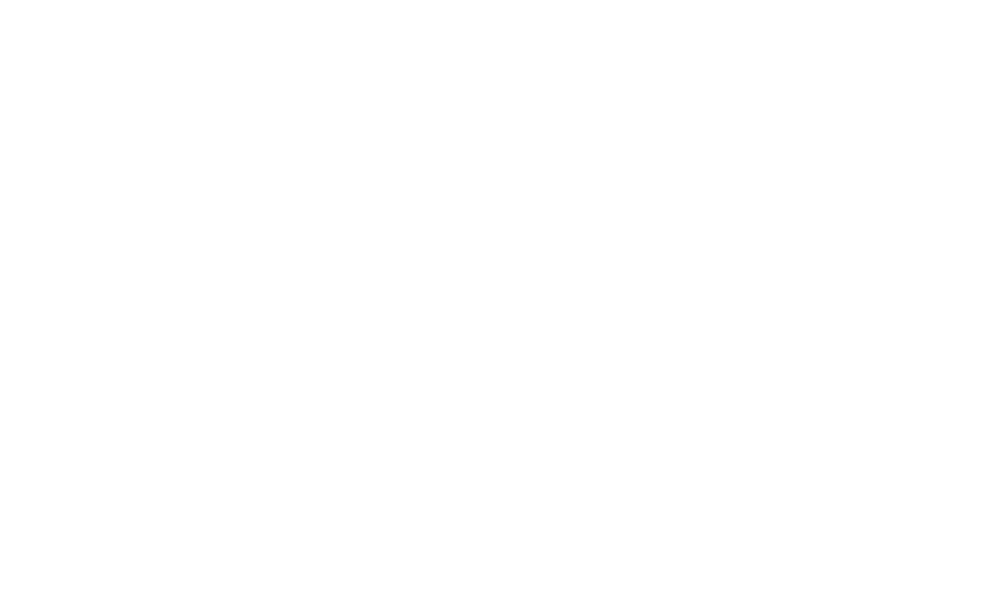

In [8]:
thresh_upper = np.min(dapi_img) + 8*(np.max(dapi_img) - np.min(dapi_img))/10

thresholded = dapi_img < thresh_upper

label_image = label(thresholded)
image_label_overlay = label2rgb(label_image, image=dapi_img)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
plt.show()

In [9]:
thresh_lower = np.min(dapi_img) + (np.max(dapi_img) - np.min(dapi_img))/10

thresholded = dapi_img > thresh_lower

thresholded = closing(thresholded, square(3))

label_image = label(thresholded)
image_label_overlay = label2rgb(label_image, image=dapi_img)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        index +=1

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
plt.show()

NameError: name 'index' is not defined

<IPython.core.display.Javascript object>


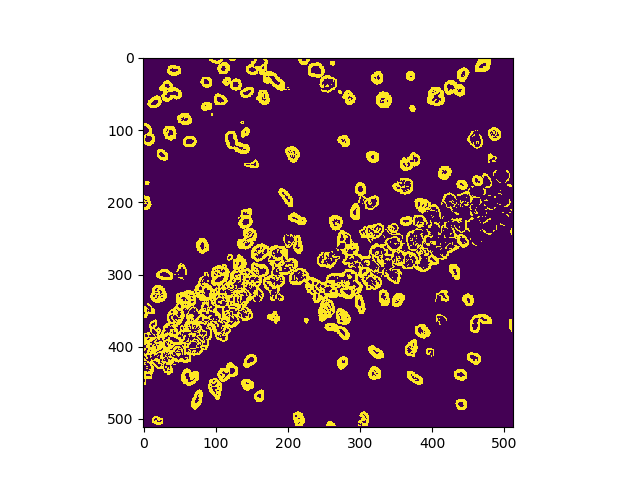

In [15]:
edges = filters.sobel(dapi_img)

thr = get_frac_thresh(edges, 0.1)

thresholded = edges > thr

plt.imshow(thresholded)
plt.show()

In [ ]:
plt.imshow(dapi_img)
plt.imshow(arc_img)
plt.imshow(homer_img)
plt.show()

In [ ]:
np.min(arc_img)
arc_img.shape

In [ ]:
arc_img

In [ ]:
cumulative = np.zeros_like(dapi_img)

for i in np.arange(512):
    for j in np.arange(512):
        if (arc_img[i,j,1] > 30) or (homer_img[i,j,0] > 30):
            cumulative[i,j] += arc_img[i,j] + homer_img[i,j]
        else:
            cumulative[i,j] += dapi_img[i,j]

In [ ]:
plt.imshow(cumulative)
plt.show()

In [ ]:
cumulative = dapi_img + homer_img + arc_img
plt.imshow(cumulative)
plt.show()

In [ ]:
np.arange(2,2)

In [ ]:
arc_img[0,0]+dapi_img[0,0]

In [ ]:
from skimage.color import rgb2gray

arc_gray = rgb2gray(arc_img)

min_lum = np.min(arc_gray)
max_lum = np.max(arc_gray)
thresh = min_lum + 0.1*(max_lum - min_lum)

foreground = arc_gray > thresh


plt.imshow(foreground)
plt.show()

In [ ]:
closed = closing(foreground, square(3))


plt.imshow(closed)
plt.show()

In [ ]:
np.max(closed.astype(int) - foreground.astype(int))

In [ ]:
import matplotlib.patches as mpatches

label_image = label(closed)
image_label_overlay = label2rgb(label_image, image=arc_img)

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(image_label_overlay)
index = 0
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 10:
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        index +=1

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
index

In [ ]:
plt.imshow(image_label_overlay)
plt.show()

In [ ]:
index = 0
for region in regionprops(label_image):
    # take regions with large enough areas
    print(region.coords.shape[0], region.area)

In [ ]:
a = ['a', 'c', 'd', 'b']
b = ['c', 'a', 'd']

c = np.concatenate((a, b))

In [ ]:
np.unique(c)

In [ ]:
edges

In [ ]:
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

mask = dapi_img < get_frac_thresh(dapi_img, 0.2)
masked = np.ma.masked_array(dapi_img, mask, fill_value = 0)
filled = masked.filled()

distance = ndi.distance_transform_edt(filled.astype(bool))
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((10, 10)), labels=filled)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=filled)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(filled, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(masked.filled(), cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Masked')
ax[1].imshow(dapi_img, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Dapi')
for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [ ]:
dapi_img.shape

In [ ]:
np.ma.masked_array(dapi_img, mask).shape

In [ ]:
masked

In [ ]:
masked.filled()